In [2]:
# Import the necessary packages
import numpy as np
import pylab as plt

%matplotlib inline

In [44]:
def plotDecisionBoundary(X, Y, scoreFn,values, title ,filename, *args):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = max((x_max-x_min)/100., (y_max-y_min)/100.)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
    
    X_values = np.c_[xx.ravel(), yy.ravel()]

    zz_mesh = np.zeros(X_values.shape[0])

    for index in range(X_values.shape[0]):

        a_in = X_values[index,:].reshape((-1,1))

        zz = scoreFn(a_in,*args)

        zz_mesh[index] = zz[0]

    zz_mesh = zz_mesh.reshape(xx.shape)
    
    print xx.shape,yy.shape,zz_mesh.shape
    CS = plt.contour(xx, yy, zz_mesh,values, linestyles = 'solid', linewidths = 4)
#     plt.clabel(CS, fontsize=9, inline=1)
#     Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=(1.-Y), s=50, cmap = plt.cm.cool)
     

    plt.title(title)
#     plt.xlabel('x')
#     plt.ylabel('y')
    plt.axis('tight')    
    
    filename_save = filename+'.png'
    plt.savefig(filename_save, bbox_inches='tight')


(94, 100) (94, 100) (94, 100)


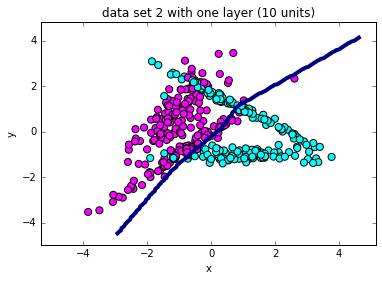

In [64]:

plotDecisionBoundary(X_train, Y_train, forward_propagation_1_layer,[0.49],title,filename,w_2,b_2,w_3,b_3,)

In [4]:
plotDecisionBoundary(X_test, Y_test, forward_propagation_1_layer,[0.5],'l1','l1',w_2,b_2,w_3,b_3,)


NameError: name 'X_test' is not defined

In [5]:
# read in the data

data_sets = {}

for i in [1,2,3,4]:
    for j in ['test','train','validate']:
        
        filename = 'data%d_%s.csv' % (i,j)
        
        # load data from csv files
        train = np.loadtxt('data/'+filename)
        # use deep copy here to make cvxopt happy
        X = train[:, 0:2].copy()
        Y = train[:, 2:3].copy()
        data_sets['X_%s_%d' % (j,i)] = X
        data_sets['Y_%s_%d' % (j,i)] = Y
        
for i in data_sets:
    print i        

X_train_2
Y_train_2
Y_train_3
Y_train_1
Y_train_4
Y_test_2
X_test_4
X_train_3
Y_test_4
X_train_1
Y_test_1
Y_test_3
X_train_4
X_validate_1
X_validate_2
X_validate_3
X_test_2
X_test_3
X_test_1
Y_validate_3
Y_validate_2
Y_validate_1
Y_validate_4
X_validate_4


In [6]:
def ReLU_single(z):
    if z > np.array([0]):
        return float(z)
    else:
        return 0.
    
#vectorize function:
ReLU = np.vectorize(ReLU_single)

def ReLU_deriv_single(z):
    if z > np.array([0]):
        return 1.
    else:
        return 0.
    
#vectorize function:
ReLU_deriv = np.vectorize(ReLU_deriv_single)

In [7]:
def unit_processing(a_in,w_in,b_in):
    #vector input to layer
    z_out = np.dot(np.transpose(w_in),a_in) + b_in
    #create diag matrix for backpropagation:
    f_dash_z_out = ReLU_deriv(z_out)
    diag_z_out = np.diag(f_dash_z_out.reshape(-1,))
    #activation values:
    a_out = ReLU(z_out)
    
    return a_out,diag_z_out

In [8]:
def forward_propagation_1_layer(a_1,w_2,b_2,w_3,b_3):    
    
    ###################### forward propagation ########################

    a_2,diag_z_2 = unit_processing(a_1,w_2,b_2)
    
    a_3,diag_z_3 = unit_processing(a_2,w_3,b_3)

    #output vector
    y_out = np.exp(a_3)/sum(np.exp(a_3))
    
    return y_out

def forward_propagation_2_layer(a_1,w_2,b_2,w_3,b_3,w_4,b_4):    
    
    ###################### forward propagation ########################

    a_2,diag_z_2 = unit_processing(a_1,w_2,b_2)
    
    a_3,diag_z_3 = unit_processing(a_2,w_3,b_3)
    
    a_4,diag_z_4 = unit_processing(a_3,w_4,b_4)

    #output vector
    y_out = np.exp(a_4)/sum(np.exp(a_4))
    
    return y_out

In [9]:
###initialize list

correct_no_list = np.array([])

Step # reached:  1000
Current training accuracy: 0.725
Current validation accuracy: 0.695
Step # reached:  2000
Current training accuracy: 0.88
Current validation accuracy: 0.8925
Step # reached:  3000
Current training accuracy: 0.87
Current validation accuracy: 0.8575
Step # reached:  4000
Current training accuracy: 0.88
Current validation accuracy: 0.89
Step # reached:  5000
Current training accuracy: 0.9075
Current validation accuracy: 0.91
Step # reached:  6000
Current training accuracy: 0.9075
Current validation accuracy: 0.8975
Step # reached:  7000
Current training accuracy: 0.925
Current validation accuracy: 0.9175
Step # reached:  8000
Current training accuracy: 0.93
Current validation accuracy: 0.9225
Step # reached:  9000
Current training accuracy: 0.9225
Current validation accuracy: 0.92
Step # reached:  10000
Current training accuracy: 0.9375
Current validation accuracy: 0.9225
Step # reached:  11000
Current training accuracy: 0.9425
Current validation accuracy: 0.925
Step

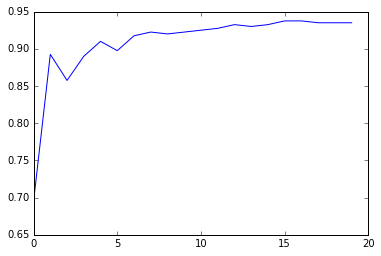

In [125]:
set_name = 4

X = data_sets['X_train_%i' %set_name] 
Y = data_sets['Y_train_%i' %set_name] 
X_train = X
Y_train = Y
X_validate = data_sets['X_validate_%i' %set_name] 
Y_validate = data_sets['Y_validate_%i' %set_name] 
X_test = data_sets['X_test_%i' %set_name]
Y_test = data_sets['Y_test_%i' %set_name]

######################################################################################
############################# Architecture with single layer #########################
######################################################################################

################################## Parameters ########################################

#learning rate and treshold (need to adjust)
learning_rate = 0.001
max_steps = 20000
step_no_to_calculate_errors = 1000

#assume data has dimensions: n x d, where n is the no. of data points and d is the dimensions, e.g. d=2 for planar data.
layer_1_dim = X.shape[1] #the number of input neurons in layer 1 is the dim of the data
output_layer_dim = 2 #the number of classes

#no of hidden layers
no_of_hid_layer = 1 #choose freely (mostly 1 or 2)
layer_2_dim = 10     #vary between large and small
layer_3_dim = output_layer_dim #constrained!

filename = 'set_%i_layer1_%i' % (set_name,layer_2_dim)
title = 'data set %i with one layer (%i units)' % (set_name,layer_2_dim)

############################### Initialize weights ########################################

#initialize weight vector in 2nd layer:
w_2 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_1_dim), size=(layer_1_dim,layer_2_dim))
#bias vector in 2nd layer:
b_2 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_1_dim), size=(layer_2_dim,1)).reshape([-1,1])
# b_2 = np.zeros((layer_2_dim,1)).reshape([-1,1])

#weight vector in 2nd layer:
w_3 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_2_dim), size=(layer_2_dim,output_layer_dim)) 
#bias vector in 2nd layer:
b_3 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_2_dim), size=(output_layer_dim,1)).reshape([-1,1])
# b_3 = np.zeros((output_layer_dim,1)).reshape([-1,1]) 


################################## SGD ########################################

#initialize step number:
step_number = 0

#initialize lists:
error_value_list = np.array([])
step_value_list = np.array([])
step_average_list = np.array([]) #last 1000
step_average = 100 #initialize to any value>treshold

classification_accuracy = np.array([])

#initialize criterion:
criterion = True

while criterion:
    
    random_index = np.random.randint(1,X.shape[0]) #pick a number in length of data.
    #define input layer (take a single one of the input data (e.g. 1 of 800)):
    #select the random input using random index:
    a_1 = X[random_index,:].reshape([-1,1]) #input vector
    target_output = Y[random_index]
    
    #map target output to 1-in-K form:
    if round(target_output)==-1:
        t_out = np.array([1.,0.]).reshape((-1,1))
    elif round(target_output)==1:
        t_out = np.array([0.,1.]).reshape((-1,1))
    else:
        print 'Float problem!!!!'
    
    ###################### forward propagation ########################

    #vector input to layer 2
    z_2 = np.dot(np.transpose(w_2),a_1) + b_2
    #create diag matrix for backpropagation:
    f_dash_z_2 = ReLU_deriv(z_2)
    diag_z_2 = np.diag(f_dash_z_2.reshape(-1,))
    #activation values:
    a_2 = ReLU(z_2)

    #vector input to layer 2
    z_3 = np.dot(np.transpose(w_3),a_2) + b_3
    #create diag matrix for backpropagation:
    f_dash_z_3 = ReLU_deriv(z_3)
    diag_z_3 = np.diag(f_dash_z_3.reshape(-1,))
    #activation values:
    a_3 = ReLU(z_3)

    #output vector
    y_out = np.exp(a_3)/sum(np.exp(a_3))
    #calculate ERROR explicitly:
    error_value = - sum(t_out*np.log(y_out))
    #keep track of error values:
    error_value_list=np.append(error_value_list,error_value)
    
    ############################## backprop ##############################
    
    # 'error' at output layer:
    delta_L = y_out - t_out

    #layer 3 error:
    delta_3 = np.dot(diag_z_3,delta_L)
    #layer 2 error:
    delta_2 = np.dot(np.dot(diag_z_2,w_3),delta_3)

    #error gradients:
    dE_dw_3 = np.outer(a_2,delta_3)
    dE_dw_2 = np.outer(a_1,delta_2)
    dE_db_3 = delta_3
    dE_db_2 = delta_2
    
    ############################# update weights #########################################

    w_3 = w_3 - learning_rate*dE_dw_3
    w_2 = w_2 - learning_rate*dE_dw_2
    b_3 = b_3 - learning_rate*dE_db_3
    b_2 = b_2 - learning_rate*dE_db_2

    step_number = step_number + 1
    
    ################### run test on test data #####################

    if step_number%step_no_to_calculate_errors == 0:
        
        ##### calculate training error ############
        classified_correctly = 0
        
        for data_index in range(X_train.shape[0]):

            a_1 = X_train[data_index,:].reshape([-1,1])
            target_output = Y_train[data_index]

            y_predicted = forward_propagation_1_layer(a_1,w_2,b_2,w_3,b_3)
            index_of_max = np.argmax(y_predicted)

            if round(index_of_max) == (round(target_output)+1)/2.:
                classified_correctly += 1

        no_of_correct_train = classified_correctly/float(X_train.shape[0]) 
        
        ##### calculate validation error ############
        classified_correctly = 0

        for data_index in range(X_validate.shape[0]):

            a_1 = X_validate[data_index,:].reshape([-1,1])
            target_output = Y_validate[data_index]

            y_predicted = forward_propagation_1_layer(a_1,w_2,b_2,w_3,b_3)
            index_of_max = np.argmax(y_predicted)

            if round(index_of_max) == (round(target_output)+1)/2.:
                classified_correctly += 1

        no_of_correct_validate = classified_correctly/float(X_validate.shape[0])   

        classification_accuracy = np.append(classification_accuracy,no_of_correct_validate)

    
        print 'Step # reached: ',step_number
        print 'Current training accuracy:', no_of_correct_train
        print 'Current validation accuracy:', no_of_correct_validate

#         treshold = 0.00001

    #     if step_average<treshold: #check if step average of last 'sum_over_no' in list is below treshold:
    #         print 'step average criterion met'
    #         criterion = False

    #stop if too many steps are reached    
    if step_number%max_steps == 0:
        criterion = False

#     if step_number%10 == 0:
#         print 'Step # reached: ',step_number
#         print 'Current accuracy:', no_of_correct
        




plt.plot(classification_accuracy)
plt.show()

# plotDecisionBoundary(X_test, Y_test, forward_propagation_1_layer,[0.5],'','',w_2,b_2,w_3,b_3,)



No of correct classification: 0.9375
(97, 100) (97, 100) (97, 100)


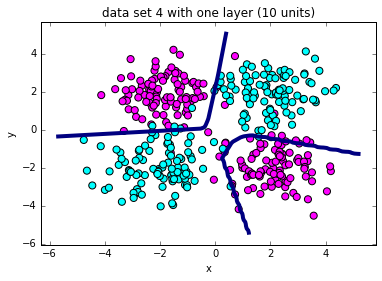

In [126]:
################### run test on test data #####################

classified_correctly = 0

for data_index in range(X_test.shape[0]):

    a_1 = X_test[data_index,:].reshape([-1,1])
    target_output = Y_test[data_index]

    y_predicted = forward_propagation_1_layer(a_1,w_2,b_2,w_3,b_3)
    index_of_max = np.argmax(y_predicted)

    if round(index_of_max) == (round(target_output)+1)/2.:
        classified_correctly += 1

no_of_correct = classified_correctly/float(X_test.shape[0])  

print 'No of correct classification:', no_of_correct

plotDecisionBoundary(X_test, Y_test, forward_propagation_1_layer,[0.49],title,filename,w_2,b_2,w_3,b_3,)


In [96]:
##### initialize lists #####

correct_no_list = np.array([])
run_info_list = []

In [156]:
set_name = 4

X = data_sets['X_train_%i' %set_name] 
Y = data_sets['Y_train_%i' %set_name] 
X_train = X
Y_train = Y
X_validate = data_sets['X_validate_%i' %set_name] 
Y_validate = data_sets['Y_validate_%i' %set_name] 
X_test = data_sets['X_test_%i' %set_name]
Y_test = data_sets['Y_test_%i' %set_name]

######################################################################################
############################# Architecture with two layers #########################
######################################################################################

################################## Parameters ########################################

#learning rate and treshold (need to adjust)
learning_rate = 0.01
max_steps = 50000
step_no_to_calculate_errors = 1000

#assume data has dimensions: n x d, where n is the no. of data points and d is the dimensions, e.g. d=2 for planar data.
layer_1_dim = X.shape[1] #the number of input neurons in layer 1 is the dim of the data
output_layer_dim = 2 #the number of classes

####no of hidden layers
# no_of_hid_layer = 2 #choose freely (mostly 1 or 2)
layer_2_dim = 50    #vary between large and small
layer_3_dim = 50
layer_4_dim = output_layer_dim #constrained!

filename = 'set_%i_layer2_%i_%i' % (set_name,layer_2_dim,layer_3_dim)
title = 'data set %i with two layers (%i & %i units)' % (set_name,layer_2_dim,layer_3_dim)

############################### Initialize weights ########################################

#initialize weight vector in 2nd layer:
w_2 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_1_dim), size=(layer_1_dim,layer_2_dim))
#bias vector in 2nd layer:
# b_2 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_1_dim), size=(layer_2_dim,1)).reshape([-1,1])
b_2 = np.zeros((layer_2_dim,1)).reshape([-1,1])

#weight vector in 2nd layer:
w_3 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_2_dim), size=(layer_2_dim,layer_3_dim)) 
#bias vector in 2nd layer:
# b_3 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_2_dim), size=(layer_3_dim,1)).reshape([-1,1])
b_3 = np.zeros((layer_3_dim,1)).reshape([-1,1]) 

#weight vector in 2nd layer:
w_4 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_3_dim), size=(layer_3_dim,layer_4_dim)) 
#bias vector in 2nd layer:
# b_4 = np.random.normal(loc=0.0, scale=1.0/np.sqrt(layer_3_dim), size=(layer_4_dim,1)).reshape([-1,1])
b_4 = np.zeros((output_layer_dim,1)).reshape([-1,1]) 


################################## SGD ########################################

#initialize step number
step_number = 0

error_value_list = np.array([])
step_value_list = np.array([])
step_average_list = np.array([]) #last 1000

#initialize criterion:
criterion = True

while criterion:
    
    random_index = np.random.randint(1,X.shape[0]) #pick a number in length of data.
    #define input layer (take a single one of the input data (e.g. 1 of 800)):
    #select the random input using random index:
    a_1 = X[random_index,:].reshape([-1,1]) #input vector
    target_output = Y[random_index]
    
    #map target output to 1-in-K form:
    if round(target_output)==-1:
        t_out = np.array([1.,0.]).reshape((-1,1))
    elif round(target_output)==1:
        t_out = np.array([0.,1.]).reshape((-1,1))
    else:
        print 'Float problem!!!!'
    
    ###################### forward propagation ########################

    #vector input to layer 2
    z_2 = np.dot(np.transpose(w_2),a_1) + b_2
    #create diag matrix for backpropagation:
    f_dash_z_2 = ReLU_deriv(z_2)
    diag_z_2 = np.diag(f_dash_z_2.reshape(-1,))
    #activation values:
    a_2 = ReLU(z_2)

    #vector input to layer 2
    z_3 = np.dot(np.transpose(w_3),a_2) + b_3
    #create diag matrix for backpropagation:
    f_dash_z_3 = ReLU_deriv(z_3)
    diag_z_3 = np.diag(f_dash_z_3.reshape(-1,))
    #activation values:
    a_3 = ReLU(z_3)
    
    #vector input to layer 2
    z_4 = np.dot(np.transpose(w_4),a_3) + b_4
    #create diag matrix for backpropagation:
    f_dash_z_4 = ReLU_deriv(z_4)
    diag_z_4 = np.diag(f_dash_z_4.reshape(-1,))
    #activation values:
    a_4 = ReLU(z_4)

    #output vector
    y_out = np.exp(a_4)/sum(np.exp(a_4))
    #calculate ERROR explicitly:
    error_value = - sum(t_out*np.log(y_out))
    #keep track of error values:
    error_value_list=np.append(error_value_list,error_value)
    
    ############################## backprop ##############################
    
    # 'error' at output layer:
    delta_L = y_out - t_out

    #layer 4 error:
    delta_4 = np.dot(diag_z_4,delta_L)
    #layer 3 error:
    delta_3 = np.dot(np.dot(diag_z_3,w_4),delta_4)
    #layer 2 error:
    delta_2 = np.dot(np.dot(diag_z_2,w_3),delta_3)

    #error gradients:
    dE_dw_4 = np.outer(a_3,delta_4)
    dE_dw_3 = np.outer(a_2,delta_3)
    dE_dw_2 = np.outer(a_1,delta_2)
    
    dE_db_4 = delta_4
    dE_db_3 = delta_3
    dE_db_2 = delta_2
    
    ############################# update weights #########################################
    
    w_4 = w_4 - learning_rate*dE_dw_4
    w_3 = w_3 - learning_rate*dE_dw_3
    w_2 = w_2 - learning_rate*dE_dw_2
    
    b_4 = b_4 - learning_rate*dE_db_4
    b_3 = b_3 - learning_rate*dE_db_3
    b_2 = b_2 - learning_rate*dE_db_2

    step_number = step_number + 1

    ################### run test on test data #####################
    
    no_of_correct_validate = 0
    no_of_correct_train = 0

    if step_number%step_no_to_calculate_errors == 0:
        
        ##### calculate training error ############
        classified_correctly = 0
        
        for data_index in range(X_train.shape[0]):

            a_1 = X_train[data_index,:].reshape([-1,1])
            target_output = Y_train[data_index]

            y_predicted = forward_propagation_2_layer(a_1,w_2,b_2,w_3,b_3,w_4,b_4)
            index_of_max = np.argmax(y_predicted)

            if round(index_of_max) == (round(target_output)+1)/2.:
                classified_correctly += 1

        no_of_correct_train = classified_correctly/float(X_train.shape[0]) 
        
        ##### calculate validation error ############
        classified_correctly = 0

        for data_index in range(X_validate.shape[0]):

            a_1 = X_validate[data_index,:].reshape([-1,1])
            target_output = Y_validate[data_index]

            y_predicted = forward_propagation_2_layer(a_1,w_2,b_2,w_3,b_3,w_4,b_4)
            index_of_max = np.argmax(y_predicted)

            if round(index_of_max) == (round(target_output)+1)/2.:
                classified_correctly += 1

        no_of_correct_validate = classified_correctly/float(X_validate.shape[0])   

        classification_accuracy = np.append(classification_accuracy,no_of_correct_validate)
            
        print 'Step # reached: ',step_number
        print 'Current training accuracy:', no_of_correct_train
        print 'Current validation accuracy:', no_of_correct_validate
        
    #stop if too many steps are reached    
    if step_number%max_steps == 0:
        criterion = False
        
    if no_of_correct_validate>0.99:
        criterion = False
    
        




plt.plot(classification_accuracy)
plt.show()

# plotDecisionBoundary(X_train, Y_train, forward_propagation_2_layer,[0.5],'','',w_2,b_2,w_3,b_3,w_4,b_4)



Step # reached:  1000
Current training accuracy: 0.73
Current validation accuracy: 0.7225
Step # reached:  2000
Current training accuracy: 0.7275
Current validation accuracy: 0.72
Step # reached:  3000
Current training accuracy: 0.735
Current validation accuracy: 0.7225
Step # reached:  4000
Current training accuracy: 0.9625
Current validation accuracy: 0.95
Step # reached:  5000
Current training accuracy: 0.945
Current validation accuracy: 0.94
Step # reached:  6000
Current training accuracy: 0.9575
Current validation accuracy: 0.96
Step # reached:  7000
Current training accuracy: 0.95
Current validation accuracy: 0.9525
Step # reached:  8000
Current training accuracy: 0.9675
Current validation accuracy: 0.955
Step # reached:  9000
Current training accuracy: 0.965
Current validation accuracy: 0.9475
Step # reached:  10000
Current training accuracy: 0.965
Current validation accuracy: 0.95
Step # reached:  11000
Current training accuracy: 0.96
Current validation accuracy: 0.95
Step # re

KeyboardInterrupt: 

No of correct classification: 0.9525
(97, 100) (97, 100) (97, 100)


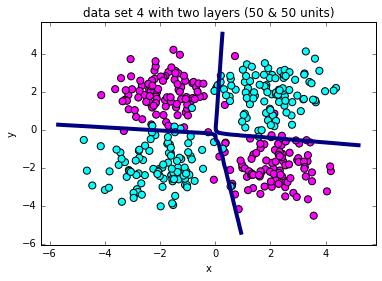

In [157]:
################### run test on test data #####################

classified_correctly = 0

for data_index in range(X_test.shape[0]):

    a_1 = X_test[data_index,:].reshape([-1,1])
    target_output = Y_test[data_index]

    y_predicted = forward_propagation_2_layer(a_1,w_2,b_2,w_3,b_3,w_4,b_4)
    index_of_max = np.argmax(y_predicted)

    if round(index_of_max) == (round(target_output)+1)/2.:
        classified_correctly += 1

no_of_correct = classified_correctly/float(X_test.shape[0])  

print 'No of correct classification:', no_of_correct

plotDecisionBoundary(X_test, Y_test, forward_propagation_2_layer,[0.49],title,filename,w_2,b_2,w_3,b_3,w_4,b_4)